<a href="https://colab.research.google.com/github/younhuiji/openCV/blob/main/CV01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title 기본 제목 텍스트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# openCV(Open Source Computer Vision Library)

 ##  1. 필터링

 ##  2. 행렬연산

 ##  3.  세분화  (Segmentation)

 ##  4. 객체 추적 (Object  Tracking)

 ##  5.  카메라  캘리브레이션 (Calibration)

 ##  6. 특징점 추출 (모션인식)

 ##  7. 물체 인식( Object  recognition)

 ##  8. 기계학습

 ##  9. 파노라마 (Stitching)

 ##  10.  컴퓨터테이셔널 포토 그래피(Computational   Photography)

 ##   https://docs.opencv.org/master
     


In [ ]:
#!python  -V

In [ ]:
#!pip  install  opencv-python
#!pip  install   opencv-contrib-python


# 이미지 데이터 처리   -> ndarray  + scikit  - image

##  1. numpy 에서 배열로 만든 이미지 로드
##  2. numpy 에서 배열로 만든 이미지 저장
##  3. 이미지 처리  : 화소값 처리  
##  4. 단색 이미지 결합
##  5. 화소반전,  감색처리  
##  6. 사칙 연산을 이용 감마값 구한 다음 보정  
##  7. 슬라이싱 작업
## 8.  알파값 블렌딩 마스크 처리  
## 9.  회전 / 사진 비교     
    

In [ ]:
 # 1. numpy 에서 배열로 만든 이미지 로드   np.array()   /  PIL .Image.open()  -> shape
from  PIL  import Image
import  numpy  as np

im= np.array(Image.open('/content/drive/MyDrive/저녁ICT/my_img/Lena.jpg'))
print(type(im))


print(im.dtype)
print(im.shape)  # 행(높이),열(폭),색상(채널)

#RGB (빨강, 그린, 파랑)   Image.open()
#BGR(파랑, 그린, 빨강)   cv2.imread()

#BGR  <-> RGB      =  cvtColor()


<class 'numpy.ndarray'>
uint8
(174, 174, 3)


In [ ]:
#1-1  numpy 에서 배열로 이미지 로드를 한 후 흑백으로 변환 해보자.
#               np.array(PIL.Image.open())-> shape   /   PIL.Image.open().convert('L')

im= np.array(Image.open('/content/drive/MyDrive/저녁ICT/my_img/Lenna.png').convert('L'))

print(type(im))
print(im.dtype)
print(im.shape)  # 행(높이),열(폭),색상(채널)


#쓰기 금지   = im.flags.writeable    / astype
print(im.flags.writeable)
res = im.astype(np.float64)
print(res.dtype)

im02= np.array(Image.open('/content/drive/MyDrive/저녁ICT/my_img/Lenna.png'), np.float64)
print (im02.dtype)
print(type(im02))

<class 'numpy.ndarray'>
uint8
(174, 174)
True
float64
float64
<class 'numpy.ndarray'>


In [ ]:
# 2. numpy 에서 배열로 만든 이미지 저장   Image.fromarray(ndarray)(1)    =>save() (2)
im= np.array(Image.open('/content/drive/MyDrive/저녁ICT/my_img/Lenna.png').convert('L'))

pil_img  = Image.fromarray(im)
print(type(pil_img) , pil_img.mode)
pil_img.save('/content/drive/MyDrive/저녁ICT/my_img/LenaG.jpg')  # 흑백 이미지

#print(dir(pil_img))
pil_img02  = Image.fromarray(im02.astype(np.uint8)) #컬러이미지
print(type(pil_img02) , pil_img02.mode)
pil_img02.save('/content/drive/MyDrive/저녁ICT/my_img/LenaC.jpg')

#유형변환  0~255 까지의 RGB   -> 화소값 변환   0.0 ~ 1.0 표현값
# uint8  ->  astype()  ->  / 스케일링작업   ->  값  * 255 -> astype()  -> save()
# jpg (1~ 95)  기본값은 75


<class 'PIL.Image.Image'> L
<class 'PIL.Image.Image'> RGB


In [ ]:
#3. 이미지 처리 : 화소값 처리
# 인덱스  [] 에서 좌표를 지정하여 화소값을 리턴받는다.
# 행, 열의 순으로 지정, 만약 좌표로 생각  y,x로 순서가 바뀐다. (주의!!!!)

im= np.array(Image.open('/content/drive/MyDrive/저녁ICT/my_img/Lenna.png'))
print(type(im))
print(im.shape) # 행, 열, 색상  -> 높이, 폭, 채널

print( '100행의  150번째 화소값을 리턴받자')

print(im[100,150])  # [220 139 118]   --->      RGB (r,g,b)

R,G,B   = im[100,150]
print(R)
print(G)
print(B)

<class 'numpy.ndarray'>
(174, 174, 3)
100행의  150번째 화소값을 리턴받자
[195 126 121]
195
126
121


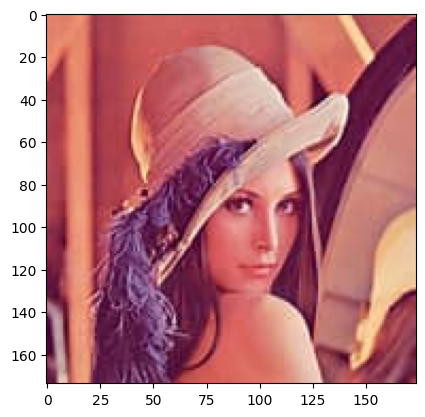

In [ ]:
# 레나를 확인 하자..
import matplotlib.pyplot  as plt
im= Image.open('/content/drive/MyDrive/저녁ICT/my_img/Lenna.png')
res = np.asarray(im)
plt.imshow(res)

In [ ]:
  #4. 단색 이미지 결합  np.concatenate()  np.copy(),  Image.framarray()
    # 배열의 결합  np.concatenate()  ,  stack  , block

im= np.array(Image.open('/content/drive/MyDrive/저녁ICT/my_img/Lenna.png'))
im_R  = im.copy()  # 배열 복사
im_R[:,:,(1,2)]=0

#lt.imshow(im_R)

im_G  = im.copy()  # 배열 복사
im_G[:,:,(0,2)]=0


im_B = im.copy()  # 배열 복사
im_B[:,:,(0,1)]=0
im_B

im_RGB = np.concatenate((im_R, im_G, im_B) , axis =1)

res_img  = Image.fromarray(im_RGB)
res_img.save('/content/drive/MyDrive/저녁ICT/my_img/LenaRGB.png' )


im_RGB02 = np.vstack((im_R, im_G, im_B))
res_img02  = Image.fromarray(im_RGB02)
res_img02.save('/content/drive/MyDrive/저녁ICT/my_img/LenaRGB02.png' )

In [ ]:
#5. 감색 처리   :   수를 줄인다   Image.open() /  fromarray(Image)  -> save()

#      //  로 나눈뒤  나머지를 버린  값을 다시 곱하면 픽셀값의 색상 수를 줄일 수 있다.

from  PIL  import  Image
import numpy   as np

im= np.array(Image.open('/content/drive/MyDrive/저녁ICT/my_img/Lenna.png'))  #이미지를 배열의 객체로 변환

im_r = im//32*32
im_r02=  im //128*128


im_RGB   = np.concatenate(( im, im_r, im_r02), axis  =1)

Image.fromarray(im_RGB).save('/content/drive/MyDrive/저녁ICT/my_img/Lena_Res_color.png')



In [ ]:
#6. 사칙 연산을 이용 감마값 구한 다음 보정

im= np.array(Image.open('/content/drive/MyDrive/저녁ICT/my_img/Lenna.png'))

im_01 =  255.0 * (im / 255.0)**(1 / 2.2)

im_02  = 255.0 * (im  /255.0)**2.2


im_gamma   =  np.concatenate((im_01, im, im_02), axis=1)


pil_img  = Image.fromarray(np.uint8(im_gamma))
pil_img.save('/content/drive/MyDrive/저녁ICT/my_img/Lena_Res_gamma.png' )


In [ ]:
!pip install Pillow

이미지의 차원:  (512, 512, 3)


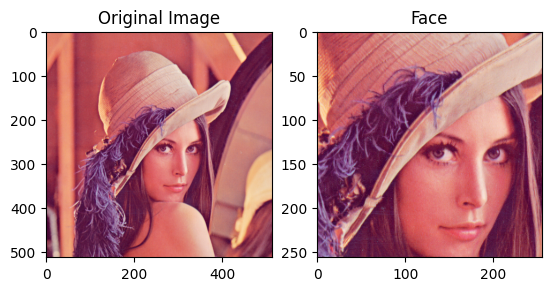

In [ ]:
#7. 슬라이싱 작업  _ 연습
import numpy as np
from PIL import Image, UnidentifiedImageError
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 웹에서 이미지 불러오기
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png', headers=headers)

if response.status_code == 200:
    try:
        img = Image.open(BytesIO(response.content))
    except UnidentifiedImageError:
        print("PIL cannot identify the image file.")
else:
    print("Failed to download the image. Status code:", response.status_code)
    img = None  # img를 None으로 설정

if img is not None:
    # 이미지를 NumPy 배열로 변환
    im = np.array(img)
    print("이미지의 차원: ", im.shape)  # 이미지의 차원 출력 (높이, 너비, 색상 채널)

    # 얼굴 부분 슬라이싱 (이 부분은 이미지의 차원에 따라 조정할 필요가 있습니다)
    h, w, c = im.shape
    face = im[h//4: 3*h//4, w//4: 3*w//4]

    # 원본 이미지와 슬라이싱된 얼굴 부분 출력
    plt.subplot(1, 2, 1)
    plt.imshow(im)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(face)
    plt.title("Face")

    plt.show()


